<a href="https://www.kaggle.com/code/septianbagussantoso/tugas-machine-learning-ds-wpv2-kelompok-8?scriptVersionId=242646607" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tugas-machine-learning-ds-wpv2/phishing.txt
/kaggle/input/tugas-machine-learning-ds-wpv2/phishing.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

2025-05-30 01:51:39.517371: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748569899.691894      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748569899.740722      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
#LOAD DATA
df = pd.read_csv("/kaggle/input/tugas-machine-learning-ds-wpv2/phishing.csv")
X = df.drop(columns=["Index", "class"], errors='ignore')
y = df["class"].replace(-1, 0)

In [4]:
#Pisahkan fitur (X) dan label (y)
X = df.drop(columns=["Index", "class"], errors='ignore')
y = df["class"].replace(-1, 0)

In [5]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#SCALING
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
#INISIALISASI MODEL SKLEARN
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Support Vector Machine": SVC(),
    "Naïve Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Extreme Gradient Boosting": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Stochastic Gradient Descent": SGDClassifier(),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
}

In [8]:
#EVALUASI MODEL SKLEARN
results = []
for name, model in models.items():
    print(f"Training {name}...")
    if name in ["Neural Network", "Support Vector Machine", "Stochastic Gradient Descent", "Logistic Regression"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred, average='binary') * 100
    recall = recall_score(y_test, y_pred, average='binary') * 100
    f1 = f1_score(y_test, y_pred, average='binary') * 100

    results.append({
        "Model": name,
        "Accuracy (%)": accuracy,
        "Precision (%)": precision,
        "Recall (%)": recall,
        "F1-Score (%)": f1
    })

Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training Support Vector Machine...
Training Naïve Bayes...
Training K-Nearest Neighbors...
Training AdaBoost...
Training Extreme Gradient Boosting...
Training Linear Discriminant Analysis...
Training Stochastic Gradient Descent...
Training Neural Network...


In [9]:
#MODEL CNN FULL FITUR
def create_cnn_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [10]:
# Train CNN dengan semua fitur
cnn_model = create_cnn_model(X_train_scaled.shape[1])
history = cnn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32,
                        validation_data=(X_test_scaled, y_test), verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-30 01:52:00.401399: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [11]:
# Prediksi CNN
y_pred_cnn = (cnn_model.predict(X_test_scaled) > 0.5).astype(int)


70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [12]:
# Hitung metrik CNN
accuracy_cnn = accuracy_score(y_test, y_pred_cnn) * 100
precision_cnn = precision_score(y_test, y_pred_cnn, average='binary') * 100
recall_cnn = recall_score(y_test, y_pred_cnn, average='binary') * 100
f1_cnn = f1_score(y_test, y_pred_cnn, average='binary') * 100

results.append({
    "Model": "CNN (All features)",
    "Accuracy (%)": accuracy_cnn,
    "Precision (%)": precision_cnn,
    "Recall (%)": recall_cnn,
    "F1-Score (%)": f1_cnn
})

In [13]:
#BUAT DATAFRAME HASIL EVALUASI
results_df = pd.DataFrame(results)

/tmp/ipykernel_13/3379157493.py:13: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


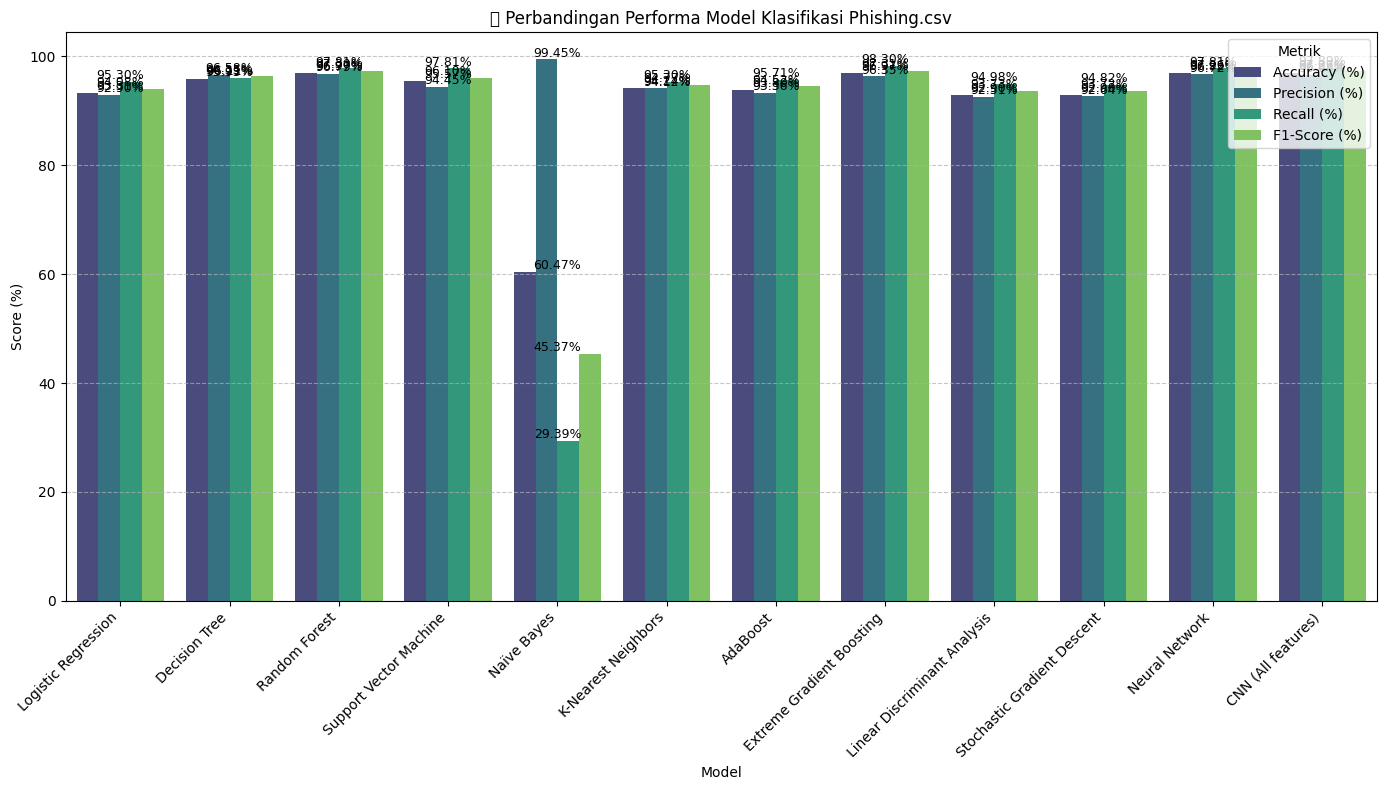

In [14]:
#VISUALISASI HASIL KESELURUHAN
plt.figure(figsize=(14, 8))
results_melted = results_df.melt(id_vars=["Model"], var_name="Metric", value_name="Value")
sns.barplot(data=results_melted, x="Model", y="Value", hue="Metric", palette="viridis")
for index, row in results_melted.iterrows():
    plt.text(index % len(results_df), row["Value"] + 0.5, f"{row['Value']:.2f}%", ha='center', fontsize=9)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Model")
plt.ylabel("Score (%)")
plt.title("📊 Perbandingan Performa Model Klasifikasi Phishing.csv")
plt.legend(title="Metrik")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [15]:
#EKSPERIMEN CNN DENGAN BEBERAPA FITUR
feature_counts = [30, 24, 17, 10]
accuracy_scores, loss_scores = [], []

for k in feature_counts:
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_selected = selector.fit_transform(X_train_scaled, y_train)
    X_test_selected = selector.transform(X_test_scaled)

    cnn_model_k = create_cnn_model(X_train_selected.shape[1])
    history = cnn_model_k.fit(X_train_selected, y_train, epochs=50, batch_size=32,
                              validation_data=(X_test_selected, y_test), verbose=0)

    accuracy_scores.append(history.history["val_accuracy"])
    loss_scores.append(history.history["val_loss"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

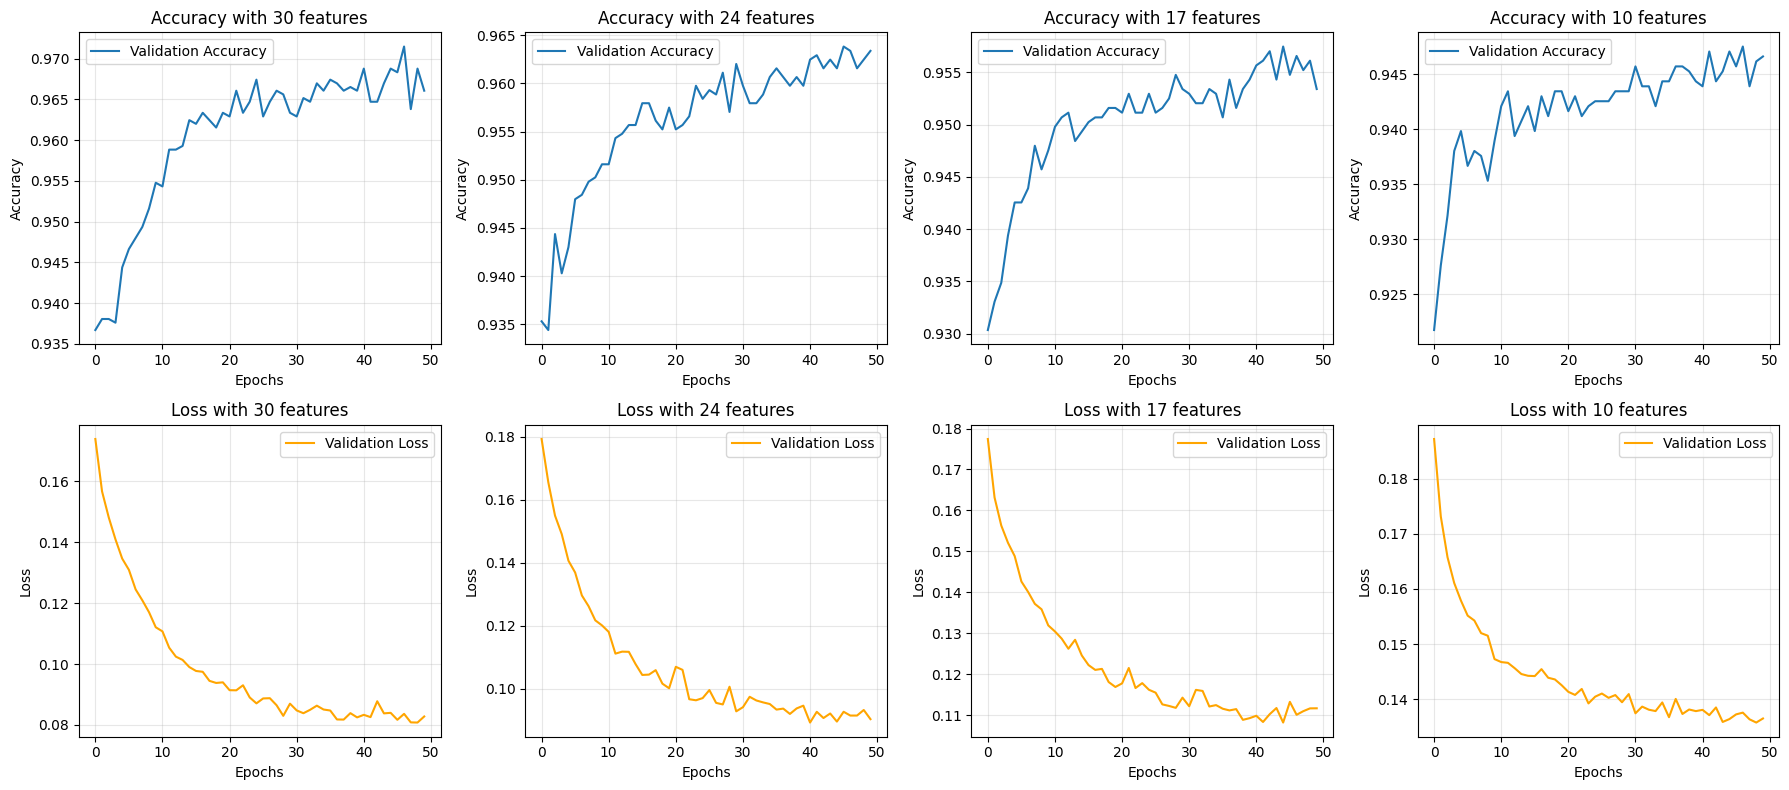

In [16]:
#VISUALISASI ACCURACY & LOSS CNN DENGAN BERBAGAI FITUR
fig, axes = plt.subplots(2, 4, figsize=(18, 8))
feature_labels = ["30 features", "24 features", "17 features", "10 features"]

for i, ax in enumerate(axes[0]):
    ax.plot(accuracy_scores[i], label="Validation Accuracy")
    ax.set_title(f"Accuracy with {feature_labels[i]}")
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Accuracy")
    ax.legend()
    ax.grid(alpha=0.3)

for i, ax in enumerate(axes[1]):
    ax.plot(loss_scores[i], label="Validation Loss", color="orange")
    ax.set_title(f"Loss with {feature_labels[i]}")
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Loss")
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()


📥 Loading data...
Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training Support Vector Machine...
Training Naïve Bayes...
Training K-Nearest Neighbors...
Training AdaBoost...
Training Extreme Gradient Boosting...
Training Linear Discriminant Analysis...
Training Stochastic Gradient Descent...
Training Neural Network...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step


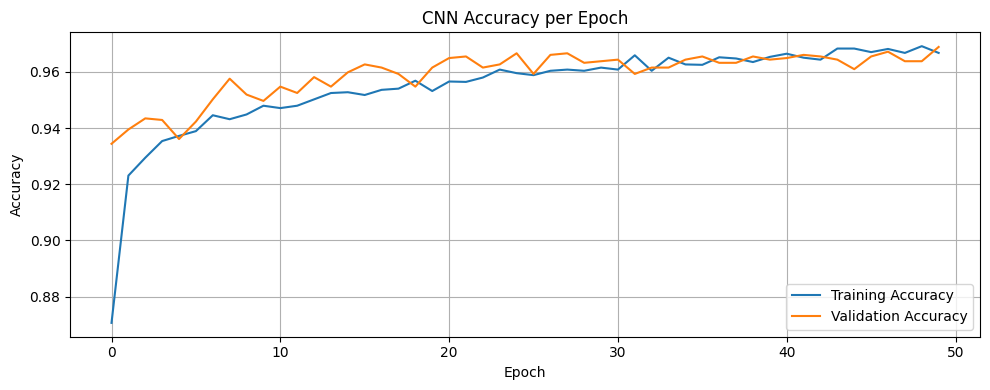

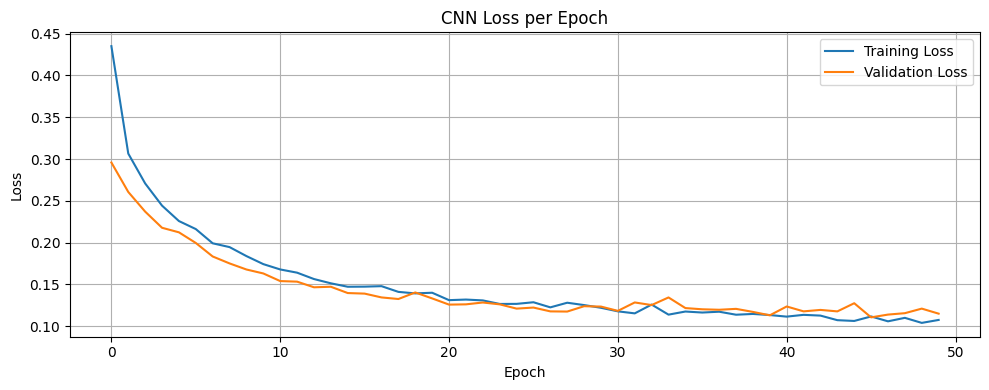

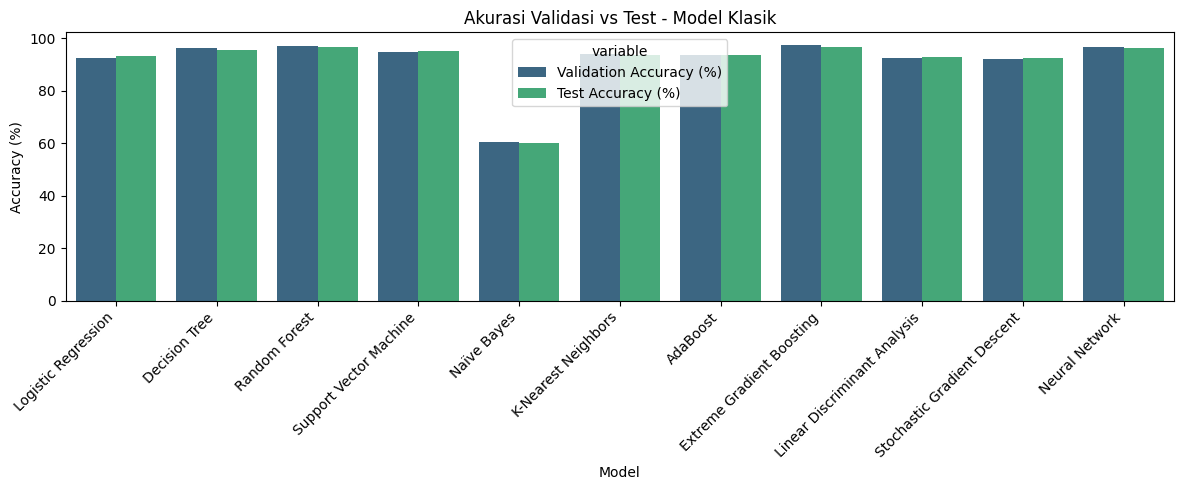

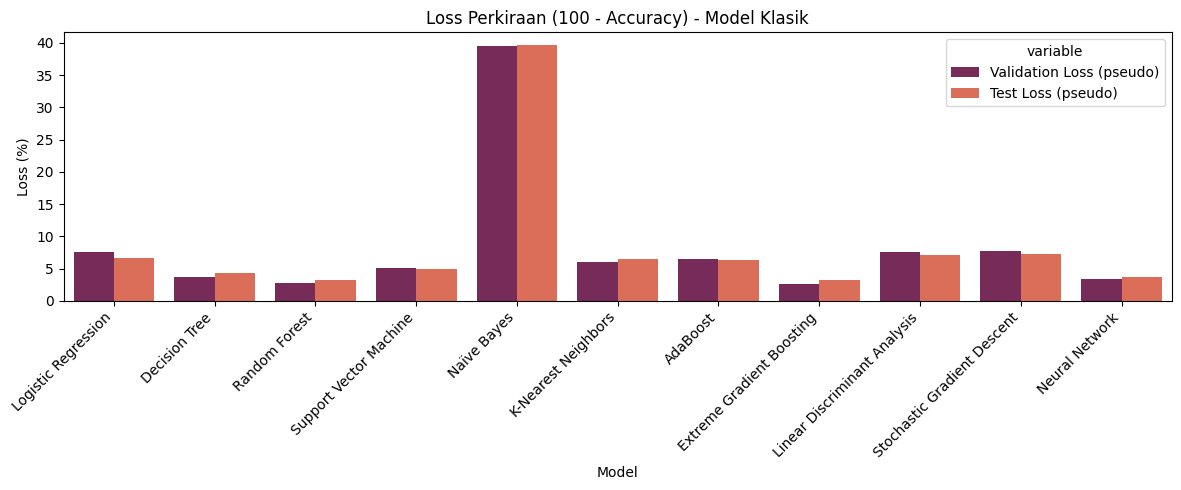

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

# LOAD DATA
print("\n📥 Loading data...")
df = pd.read_csv("/kaggle/input/tugas-machine-learning-ds-wpv2/phishing.csv")
X = df.drop(columns=["Index", "class"], errors='ignore')
y = df["class"].replace(-1, 0)

# SPLIT DATA: Train-Test, then Train-Validation
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# SCALING
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# INISIALISASI MODEL SKLEARN
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Support Vector Machine": SVC(),
    "Naïve Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Extreme Gradient Boosting": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Stochastic Gradient Descent": SGDClassifier(),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
}

# EVALUASI MODEL SKLEARN
results = []
for name, model in models.items():
    print(f"Training {name}...")
    if name in ["Neural Network", "Support Vector Machine", "Stochastic Gradient Descent", "Logistic Regression"]:
        model.fit(X_train_scaled, y_train)
        y_val_pred = model.predict(X_val_scaled)
        y_test_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_val)
        y_test_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Validation Accuracy (%)": accuracy_score(y_val, y_val_pred) * 100,
        "Test Accuracy (%)": accuracy_score(y_test, y_test_pred) * 100
    })

# CNN MODEL DENGAN L2 DAN DROPOUT UNTUK CEGAH OVER/UNDERFITTING
def create_optimized_cnn_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,), kernel_regularizer=l2(0.001)),
        Dropout(0.4),
        Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# TRAIN CNN
cnn_model = create_optimized_cnn_model(X_train_scaled.shape[1])
history = cnn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32,
                        validation_data=(X_val_scaled, y_val), verbose=0)

# PREDIKSI CNN
y_val_pred_cnn = (cnn_model.predict(X_val_scaled) > 0.5).astype(int)
y_test_pred_cnn = (cnn_model.predict(X_test_scaled) > 0.5).astype(int)

# SIMPAN METRIK CNN
results.append({
    "Model": "CNN (Optimized)",
    "Validation Accuracy (%)": accuracy_score(y_val, y_val_pred_cnn) * 100,
    "Test Accuracy (%)": accuracy_score(y_test, y_test_pred_cnn) * 100
})

# VISUALISASI CNN - ACCURACY DAN LOSS PER EPOCH
plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("CNN Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("CNN Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# VISUALISASI PERBANDINGAN VALIDASI & TEST - MODEL KLASIK
results_df = pd.DataFrame(results)
classic_df = results_df[results_df["Model"] != "CNN (Optimized)"].copy()
classic_df["Validation Loss (pseudo)"] = 100 - classic_df["Validation Accuracy (%)"]
classic_df["Test Loss (pseudo)"] = 100 - classic_df["Test Accuracy (%)"]

# GRAFIK AKURASI VALIDASI VS TEST - MODEL KLASIK
plt.figure(figsize=(12, 5))
sns.barplot(data=classic_df.melt(id_vars="Model", value_vars=["Validation Accuracy (%)", "Test Accuracy (%)"]),
            x="Model", y="value", hue="variable", palette="viridis")
plt.title("Akurasi Validasi vs Test - Model Klasik")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# GRAFIK PSEUDO LOSS - MODEL KLASIK
plt.figure(figsize=(12, 5))
sns.barplot(data=classic_df.melt(id_vars="Model", value_vars=["Validation Loss (pseudo)", "Test Loss (pseudo)"]),
            x="Model", y="value", hue="variable", palette="rocket")
plt.title("Loss Perkiraan (100 - Accuracy) - Model Klasik")
plt.ylabel("Loss (%)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7740 - loss: 0.6271 - val_accuracy: 0.9361 - val_loss: 0.3220
Epoch 2/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9115 - loss: 0.3728 - val_accuracy: 0.9373 - val_loss: 0.2864
Epoch 3/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9215 - loss: 0.3054 - val_accuracy: 0.9395 - val_loss: 0.2610
Epoch 4/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9330 - loss: 0.2729 - val_accuracy: 0.9401 - val_loss: 0.2382
Epoch 5/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9346 - loss: 0.2494 - val_accuracy: 0.9446 - val_loss: 0.2191
Epoch 6/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9387 - loss: 0.2294 - val_accuracy: 0.9429 - val_loss: 0.2069
Epoch 7/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9422 - loss: 0.2159 - val_accuracy: 0.9446 - val_loss: 0.1957
Epoch 8/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9416 - loss: 0.2041 - val_accuracy: 0.9452

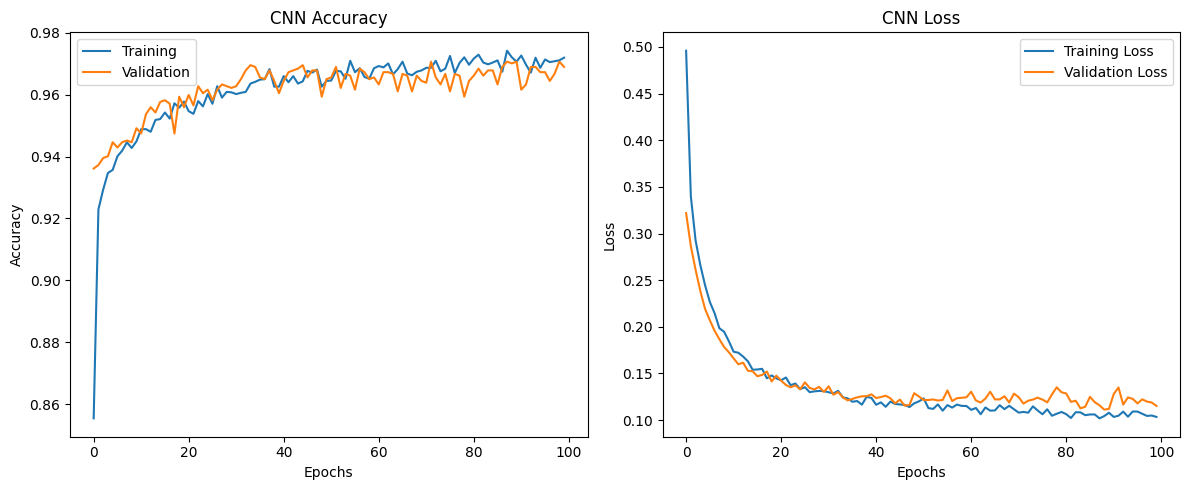

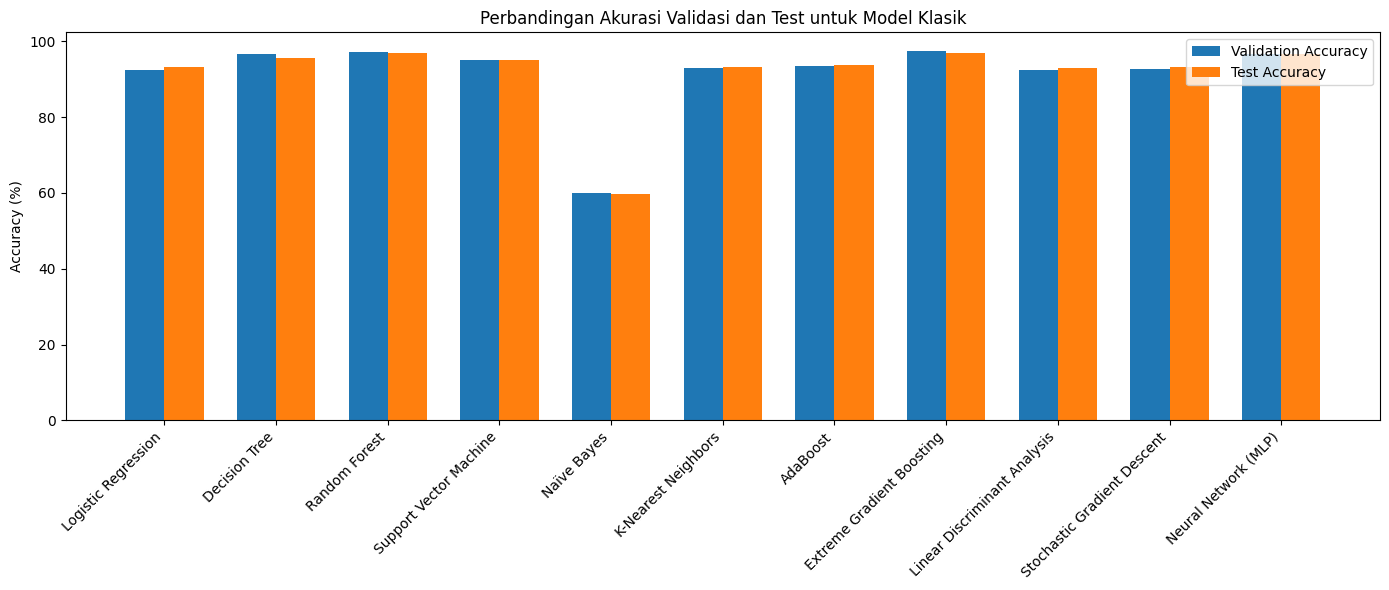


📋 Akurasi & Loss Validasi per Model:
Logistic Regression: 92.4251% | Loss: 0.1835
Decision Tree: 96.6083% | Loss: 0.7740
Random Forest: 97.1170% | Loss: 0.1228
Support Vector Machine: 94.9689%
Naïve Bayes: 59.9774% | Loss: 2.4449
K-Nearest Neighbors: 92.9339% | Loss: 0.2915
AdaBoost: 93.5557% | Loss: 0.6099
Extreme Gradient Boosting: 97.4562% | Loss: 0.0717
Linear Discriminant Analysis: 92.3686% | Loss: 0.2243
Stochastic Gradient Descent: 92.7077%
Neural Network (MLP): 96.4952% | Loss: 0.1081

📋 Akurasi & Loss Test per Model:
Logistic Regression: 93.3062% | Loss: 0.1745
Decision Tree: 95.5224% | Loss: 1.1917
Random Forest: 96.9245% | Loss: 0.1444
Support Vector Machine: 95.0701%
Naïve Bayes: 59.7015% | Loss: 2.4735
K-Nearest Neighbors: 93.1253% | Loss: 0.4081
AdaBoost: 93.6228% | Loss: 0.6087
Extreme Gradient Boosting: 96.7888% | Loss: 0.0796
Linear Discriminant Analysis: 92.9444% | Loss: 0.2139
Stochastic Gradient Descent: 93.0801%
Neural Network (MLP): 96.5174% | Loss: 0.1019


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

# LOAD DATASET
path = "/kaggle/input/tugas-machine-learning-ds-wpv2/phishing.csv"
df = pd.read_csv(path)

# PREPROCESSING
X = df.drop(columns=["Index", "class"], errors='ignore')
y = df["class"].replace(-1, 0)

# SPLIT DATA MENJADI TRAIN + TEST LALU TRAIN MENJADI TRAIN + VALIDATION
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42)

# SCALING
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# MODEL KLASIK
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Support Vector Machine": SVC(),
    "Naïve Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Extreme Gradient Boosting": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Stochastic Gradient Descent": SGDClassifier(),
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
}

results_val = []
results_test = []
acc_val_list = []
acc_test_list = []
loss_val_list = []
loss_test_list = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_val_pred = model.predict(X_val_scaled)
    y_test_pred = model.predict(X_test_scaled)

    acc_val = accuracy_score(y_val, y_val_pred) * 100
    acc_test = accuracy_score(y_test, y_test_pred) * 100
    loss_val = log_loss(y_val, model.predict_proba(X_val_scaled)) if hasattr(model, "predict_proba") else None
    loss_test = log_loss(y_test, model.predict_proba(X_test_scaled)) if hasattr(model, "predict_proba") else None

    acc_val_list.append((name, acc_val))
    acc_test_list.append((name, acc_test))
    loss_val_list.append((name, loss_val))
    loss_test_list.append((name, loss_test))

    results_val.append({"Model": name, "Accuracy (%)": acc_val, "Loss": loss_val})
    results_test.append({"Model": name, "Accuracy (%)": acc_test, "Loss": loss_test})

# MODEL CNN

def create_cnn_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,), kernel_regularizer=l2(0.001)),
        Dropout(0.4),
        Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.3),
        Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

cnn_model = create_cnn_model(X_train_scaled.shape[1])
history = cnn_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32,
                        validation_data=(X_val_scaled, y_val), verbose=1)

# Evaluasi CNN
cnn_val_acc = cnn_model.evaluate(X_val_scaled, y_val, verbose=0)[1] * 100
cnn_test_acc = cnn_model.evaluate(X_test_scaled, y_test, verbose=0)[1] * 100
cnn_val_loss = cnn_model.evaluate(X_val_scaled, y_val, verbose=0)[0]
cnn_test_loss = cnn_model.evaluate(X_test_scaled, y_test, verbose=0)[0]

# LIST DETAIL HASIL CNN
cnn_accuracy_list = {
    "Validation Accuracy": cnn_val_acc,
    "Test Accuracy": cnn_test_acc,
    "Validation Loss": cnn_val_loss,
    "Test Loss": cnn_test_loss
}

print("\n📋 Akurasi & Loss CNN secara rinci:")
for key, value in cnn_accuracy_list.items():
    print(f"{key}: {value:.4f}")

# VISUALISASI CNN
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('CNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# VISUALISASI PERBANDINGAN VALIDASI VS TEST
results_val_df = pd.DataFrame(results_val)
results_test_df = pd.DataFrame(results_test)
results_combined = pd.merge(results_val_df, results_test_df, on="Model", suffixes=(" Validation", " Test"))

plt.figure(figsize=(14, 6))
bar_width = 0.35
x = np.arange(len(results_combined["Model"]))

plt.bar(x - bar_width/2, results_combined["Accuracy (%) Validation"], width=bar_width, label="Validation Accuracy")
plt.bar(x + bar_width/2, results_combined["Accuracy (%) Test"], width=bar_width, label="Test Accuracy")

plt.xticks(x, results_combined["Model"], rotation=45, ha="right")
plt.ylabel("Accuracy (%)")
plt.title("Perbandingan Akurasi Validasi dan Test untuk Model Klasik")
plt.legend()
plt.tight_layout()
plt.show()

# LIST DETAIL HASIL VALIDASI DAN TEST
print("\n📋 Akurasi & Loss Validasi per Model:")
for (model, acc), (_, loss) in zip(acc_val_list, loss_val_list):
    loss_str = f" | Loss: {loss:.4f}" if loss is not None else ""
    print(f"{model}: {acc:.4f}%{loss_str}")

print("\n📋 Akurasi & Loss Test per Model:")
for (model, acc), (_, loss) in zip(acc_test_list, loss_test_list):
    loss_str = f" | Loss: {loss:.4f}" if loss is not None else ""
    print(f"{model}: {acc:.4f}%{loss_str}")
